In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report ,precision_score,recall_score, f1_score
from sklearn.model_selection import train_test_split
import math
import seaborn as sns
import random
from IPython import display

np.random.seed(0)


This code imports essential libraries for numerical operations (NumPy), data visualization (Matplotlib), synthetic dataset generation (make_blobs), dataset splitting (train_test_split), model evaluation (accuracy, precision, recall, F1-score, and confusion matrix), mathematical functions and randomization (math and random), dynamic notebook outputs (IPython.display), and reproducibility (np.random.seed(0)).



<ipython-input-5-854032f2cce6>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  scatter = plt.scatter(x[:,0],x[:,1], c=y,cmap=plt.cm.get_cmap('plasma',nc), marker='o', s=20)


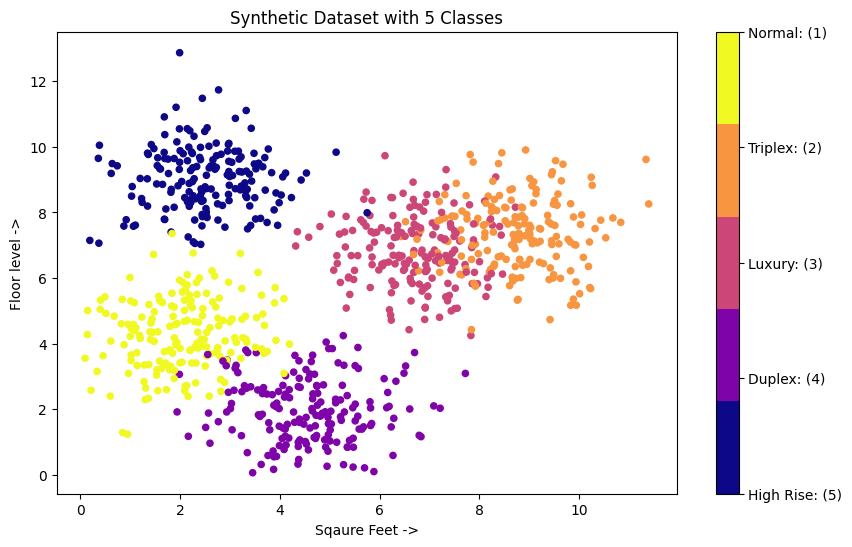

In [ ]:
ns = 900
nf = 2
nc = 5
rs = 42

x,y = make_blobs(n_samples=ns,n_features=nf, centers=nc, random_state=rs)
x = abs(x)
y = abs(y)

x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=rs)

classNames = ['Normal: (1)','Triplex: (2)','Luxury: (3)','Duplex: (4)','High Rise: (5)']
plt.figure(figsize=(10,6))
scatter = plt.scatter(x[:,0],x[:,1], c=y,cmap=plt.cm.get_cmap('plasma',nc), marker='o', s=20)
#plt.xlim(1, 200)
#plt.ylim(1, 30)
cbar = plt.colorbar(scatter, ticks=range(nc))
cbar.set_ticklabels(classNames[::-1])
plt.title('Synthetic Dataset with 5 Classes')
plt.xlabel('Sqaure Feet ->')
plt.ylabel('Floor level ->')

plt.show()


This code generates a synthetic dataset with five classes using make_blobs, simulating different housing categories: Normal, Triplex, Luxury, Duplex, and High Rise. It creates 900 samples with two features, ensures all values are positive using abs(), and splits the data into training and testing sets. A scatter plot is used to visualize the data distribution, where each point is colored according to its class using the 'plasma' colormap. A color bar with custom labels maps each color to a specific housing type. The plot includes axis labels for square footage and floor level, along with a title, providing a clear visual representation of the five-class dataset.











In [ ]:
x_train

array([[8.40515236, 7.57201766],
       [2.31013793, 8.41406925],
       [7.45080618, 6.30752681],
       ...,
       [1.83940379, 5.53632798],
       [8.24357341, 8.17693847],
       [5.12088807, 2.19705371]])

In [ ]:
y_train

array([2, 0, 2, 4, 1, 1, 0, 3, 0, 4, 3, 4, 0, 3, 3, 4, 2, 0, 0, 2, 2, 1,
       1, 0, 2, 2, 0, 1, 4, 2, 0, 2, 1, 1, 1, 4, 2, 1, 2, 4, 0, 4, 3, 0,
       1, 1, 4, 0, 2, 3, 2, 1, 0, 3, 4, 4, 4, 0, 1, 2, 1, 2, 4, 1, 3, 2,
       2, 1, 1, 2, 1, 1, 0, 0, 1, 4, 3, 0, 3, 3, 4, 2, 1, 2, 4, 3, 3, 1,
       3, 2, 1, 2, 3, 4, 3, 4, 3, 3, 2, 2, 2, 4, 1, 0, 4, 4, 1, 3, 3, 0,
       2, 4, 3, 0, 1, 0, 4, 1, 1, 0, 3, 3, 0, 3, 3, 4, 2, 0, 3, 2, 4, 1,
       4, 1, 1, 0, 0, 3, 1, 4, 1, 0, 4, 1, 4, 1, 4, 1, 1, 0, 4, 2, 1, 1,
       1, 4, 2, 4, 4, 0, 0, 0, 0, 4, 0, 4, 3, 0, 1, 0, 0, 3, 3, 2, 3, 4,
       4, 4, 2, 0, 2, 4, 3, 1, 2, 0, 1, 3, 3, 1, 0, 0, 4, 1, 0, 0, 1, 4,
       2, 2, 2, 2, 4, 4, 2, 0, 0, 0, 1, 3, 4, 1, 2, 4, 1, 2, 2, 1, 3, 0,
       3, 0, 3, 2, 0, 2, 3, 0, 3, 2, 0, 1, 1, 3, 0, 3, 3, 2, 0, 2, 3, 3,
       0, 2, 3, 4, 2, 2, 3, 2, 4, 3, 0, 3, 2, 4, 1, 4, 2, 0, 2, 3, 3, 2,
       4, 4, 4, 4, 4, 2, 1, 1, 4, 4, 2, 0, 3, 3, 1, 0, 0, 0, 4, 4, 4, 4,
       1, 3, 3, 4, 4, 2, 3, 1, 0, 1, 0, 0, 4, 3, 2,

In [ ]:
x_test

array([[ 1.6875249 ,  3.75780309],
       [ 4.370472  ,  2.69071194],
       [ 2.62484591,  8.71318243],
       [ 6.91431208,  6.64589486],
       [ 7.82902608,  4.24772753],
       [ 9.20328049,  6.48431325],
       [ 4.18981336,  2.59601962],
       [ 4.15227261,  1.5406115 ],
       [ 5.56605638,  3.88258632],
       [ 9.54031944,  6.660622  ],
       [ 3.33540934,  2.64284223],
       [ 2.60193341,  4.48724787],
       [ 2.18503127,  8.88414307],
       [ 6.68310602,  6.17110584],
       [ 4.60224413,  3.07647157],
       [ 6.25781723,  8.45033431],
       [ 5.12894273,  9.83618863],
       [ 5.68458056,  8.4032965 ],
       [ 6.10792848,  9.72865221],
       [ 1.03130358,  8.49601591],
       [ 8.85796556,  7.87601287],
       [ 8.90992902,  7.28630068],
       [ 2.82446687,  9.77325535],
       [ 3.69220474,  4.55612309],
       [ 2.21612515,  8.29993471],
       [ 2.54502366, 10.57892978],
       [ 4.68840046,  1.14221957],
       [ 3.35944948,  3.72796387],
       [ 7.08563082,

In [ ]:
y_test

array([4, 1, 0, 2, 2, 3, 1, 1, 1, 3, 1, 4, 0, 2, 1, 2, 0, 2, 2, 0, 3, 3,
       0, 4, 0, 0, 1, 1, 1, 3, 0, 1, 0, 4, 0, 0, 3, 1, 2, 2, 1, 4, 0, 1,
       2, 1, 2, 0, 3, 2, 1, 1, 1, 0, 4, 1, 4, 4, 4, 2, 0, 2, 0, 3, 2, 3,
       2, 1, 1, 1, 3, 3, 3, 2, 2, 3, 3, 1, 2, 0, 0, 4, 0, 1, 2, 4, 3, 0,
       1, 0, 1, 4, 0, 0, 3, 3, 2, 1, 1, 3, 3, 2, 4, 2, 3, 1, 4, 2, 4, 4,
       3, 3, 2, 3, 0, 0, 0, 2, 2, 2, 3, 4, 4, 0, 2, 2, 4, 4, 2, 4, 4, 0,
       4, 3, 3, 0, 0, 2, 2, 0, 2, 2, 3, 0, 4, 1, 0, 2, 2, 0, 2, 4, 4, 0,
       4, 2, 1, 3, 0, 2, 4, 2, 3, 1, 0, 4, 1, 1, 0, 4, 0, 3, 0, 0, 2, 1,
       0, 0, 1, 4])

In [ ]:
print("Shapes of Each Data :")
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


Shapes of Each Data :
(720, 2)
(720,)
(180, 2)
(180,)


In [ ]:
class NeuralNetwork(object):
    def __init__(self) :
        iLn = 2
        hLN1 = 500
        hLN2 = 500
        hLN3 = 500
        oLn = nc
        self.eta = 0.1

        self.wHL1 = np.random.randn(iLn,hLN1)
        self.wHL2 = np.random.randn(hLN1,hLN2)
        self.wHL3 = np.random.randn(hLN2,hLN3)
        self.WO = np.random.randn(hLN3,oLn)

        self.b1 = np.zeros((1,hLN1))
        self.b2 = np.zeros((1,hLN2))
        self.b3 = np.zeros((1,hLN3))
        self.WB = np.zeros((1,oLn))


    def ForwardProp(self,x) :
        self.HO1 = self.sigmoid(np.dot(x, self.wHL1) + self.b1)
        self.HO2 = self.sigmoid(np.dot(self.HO1, self.wHL2) + self.b2)
        self.HO3 = self.sigmoid(np.dot(self.HO2, self.wHL3) + self.b3)
        self.output = self.softmax((np.dot(self.HO3, self.WO) + self.WB))

        return self.output

    def BackProp(self,x,outputValues) :
        m = x.shape[0]

        diff_out = self.output - outputValues
        d_WO = (1/m) * np.dot(self.HO3.T, diff_out)
        d_WB = (1/m) * np.sum(diff_out, axis=0, keepdims=True)

        d_hidden3 = np.dot(diff_out, self.WO.T) * self.sigmoid_dev(self.HO3)
        d_W_HI3 = (1/m) * np.dot(self.HO2.T, d_hidden3)
        d_b3 = (1/m) * np.sum(d_hidden3, axis=0, keepdims=True)

        d_hidden2 = np.dot(d_hidden3, self.wHL3.T) * self.sigmoid_dev(self.HO2)
        d_W_HI2 = (1/m) * np.dot(self.HO1.T, d_hidden2)
        d_b2 = (1/m) * np.sum(d_hidden2, axis=0, keepdims=True)

        d_hidden1 = np.dot(d_hidden2, self.wHL2.T) * self.sigmoid_dev(self.HO1)
        d_W_HI1 = (1/m) * np.dot(x.T, d_hidden1)
        d_b1 = (1/m) * np.sum(d_hidden1, axis=0, keepdims=True)

    #Updating the neural layer's weights and biases
        self.WO -= self.eta * d_WO
        self.WB -= self.eta * d_WB
        self.wHL3 -= self.eta * d_W_HI3
        self.b3 -= self.eta * d_b3
        self.wHL2 -= self.eta * d_W_HI2
        self.b2 -= self.eta * d_b2
        self.wHL1 -= self.eta * d_W_HI1
        self.b1 -= self.eta * d_b1


    def sigmoid(self,x) :
        return 1/(1 + np.exp(-x))

    def sigmoid_dev(self,x):
        return x * (1-x)

    def softmax(self, x):
        exp_scores = np.exp(x)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def predict(self, x):
        probabilities = self.ForwardProp(x)
        return np.argmax(probabilities, axis=1)

    def ReLU(x,ok=False):
        if ok == True :
            return np.maximum(0, x)
        else :
            return np.where(x <= 0, 0, 1)

In [ ]:
NN = NeuralNetwork()

In [ ]:
# for multiple class i have encoded the output number if nth classes
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

y_train_one_hot = one_hot_encode(y_train, nc)

Epoch 0,Loss: 9.61344697475035
Epoch 100,Loss: 0.6041833877347964
Epoch 200,Loss: 0.5384302791335238
Epoch 300,Loss: 0.5173163822217338
Epoch 400,Loss: 0.509162523148657
Epoch 500,Loss: 0.47975434941249495
Epoch 600,Loss: 0.4199110500887857
Epoch 700,Loss: 0.4148762220329393
Epoch 800,Loss: 0.4117873087445923
Epoch 900,Loss: 0.38375291219680563
Epoch 1000,Loss: 0.3606316170098457
Epoch 1100,Loss: 0.3412867275798347
Epoch 1200,Loss: 0.32723241308750517
Epoch 1300,Loss: 0.3060702892765237
Epoch 1400,Loss: 0.295553574443774
Epoch 1500,Loss: 0.28263929393036236
Epoch 1600,Loss: 0.2757465424238821
Epoch 1700,Loss: 0.26506559068182833
Epoch 1800,Loss: 0.2580300675830616
Epoch 1900,Loss: 0.250725574344165
Epoch 2000,Loss: 0.2455189156906982
Epoch 2100,Loss: 0.2410753201403612
Epoch 2200,Loss: 0.23644642287804155
Epoch 2300,Loss: 0.23153686630087245
Epoch 2400,Loss: 0.22696704267881473
Epoch 2500,Loss: 0.2229195558249207
Epoch 2600,Loss: 0.21941049284929903
Epoch 2700,Loss: 0.21649609707899067

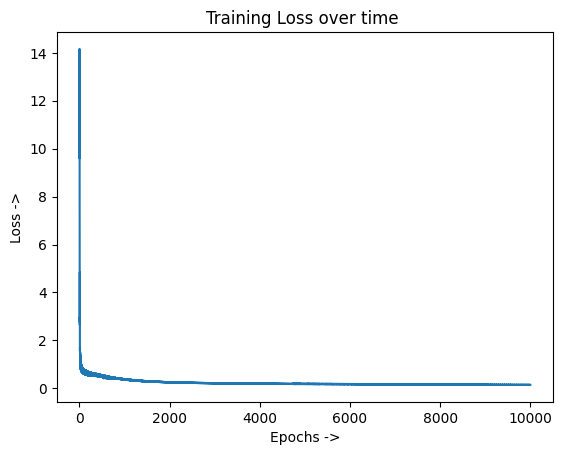

In [ ]:
#Training phrase starts
err = []

epochs = 10000

for i in range(epochs):
    output = NN.ForwardProp(x_train)
    NN.BackProp(x_train, y_train_one_hot)

#Calculating loss using cross-entropy
    loss = np.mean(-np.sum(y_train_one_hot * np.log(output), axis=1))
    err.append(loss)

    if i % 100 == 0:
        print(f'Epoch {i},Loss: {loss}')

plt.plot(err)
plt.xlabel('Epochs ->')
plt.ylabel('Loss ->')
plt.title('Training Loss over time ')
plt.show()

This code implements a fully connected multi-layer neural network with forward propagation, backpropagation for weight updates, and early stopping based on loss; it trains the network on a dataset, visualizes the loss curve.

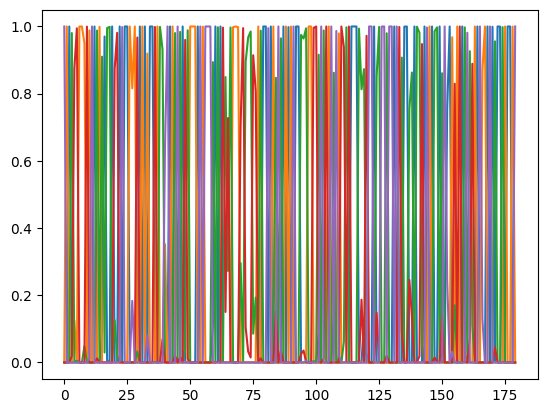

In [ ]:
# testing
yPred = NN.ForwardProp(x_test)
plt.plot(yPred)


This code tests the neural network model by performing forward propagation on the test dataset (x_test) using the ForwardProp method. It then plots the predicted outputs (yPred) using matplotlib. The plot displays the model's predictions for the test data, providing a visual representation of how well the neural network has learned to predict the target values. The resulting graph can help assess whether the model's outputs align with expectations or highlight areas for improvement.

In [ ]:
# test 1
area1 = 10
floor1 = 10
test1 = NN.ForwardProp([[area1, floor1]])

predicted_class = np.argmax(test1)

print("Classes with Probabilities:\n")
for i, name in enumerate(classNames):
    print(f"Class {i+1} ({name}): {test1[0][i]:.4f}")

print("\nPredicted Class:")
print(f"{classNames[predicted_class]} ({test1[0][predicted_class]:.4f})")

Classes with Probabilities:

Class 1 (Normal: (1)): 0.0000
Class 2 (Triplex: (2)): 0.0000
Class 3 (Luxury: (3)): 0.0042
Class 4 (Duplex: (4)): 0.9958
Class 5 (High Rise: (5)): 0.0000

Predicted Class:
Duplex: (4) (0.9958)


In [ ]:
# test 2
area2 = 5
floor2 = 5
test2 = NN.ForwardProp([[area2, floor2]])

predicted_class = np.argmax(test2)

print("Classes with Probabilities:\n")
for i, name in enumerate(classNames):
    print(f"Class {i+1} ({name}): {test2[0][i]:.4f}")

print("\nPredicted Class:")
print(f"{classNames[predicted_class]} ({test2[0][predicted_class]:.4f})")


Classes with Probabilities:

Class 1 (Normal: (1)): 0.0001
Class 2 (Triplex: (2)): 0.0001
Class 3 (Luxury: (3)): 0.8535
Class 4 (Duplex: (4)): 0.0016
Class 5 (High Rise: (5)): 0.1446

Predicted Class:
Luxury: (3) (0.8535)


In [ ]:
yPredCls = np.argmax(yPred, axis=1)

#Accuracy
accuracy = accuracy_score(y_test, yPredCls)
print("Accuracy of this model :", accuracy*100,'%')

Accuracy of this model : 92.22222222222223 %


In [ ]:
#Precision
precision = precision_score(y_test, yPredCls, average='weighted')

In [ ]:
#Recall
recall = recall_score(y_test, yPredCls, average='weighted')


In [ ]:
#F1 Score
f1 = f1_score(y_test, yPredCls, average='weighted')

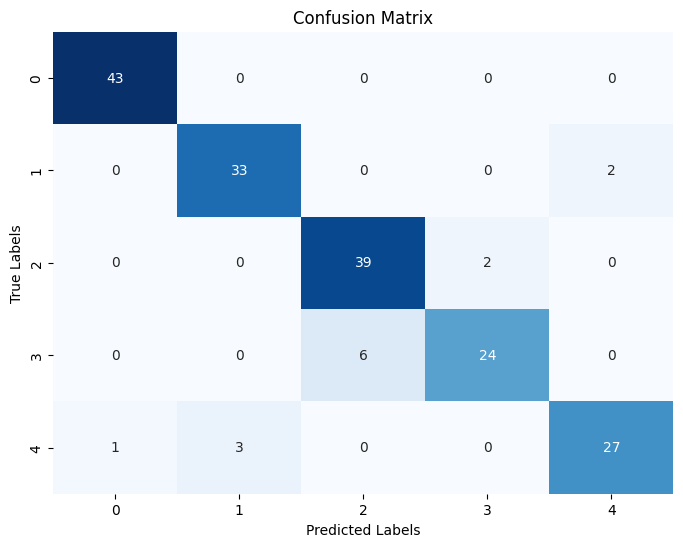

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, yPredCls)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

This code evaluates the neural network's performance on the test set by calculating accuracy, comparing predicted labels with true labels, and visualizing the test data with true labels and predicted labels.

In [ ]:
#Classification report
print('Classification Report:')
print(classification_report(y_test, yPredCls))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       0.92      0.94      0.93        35
           2       0.87      0.95      0.91        41
           3       0.92      0.80      0.86        30
           4       0.93      0.87      0.90        31

    accuracy                           0.92       180
   macro avg       0.92      0.91      0.92       180
weighted avg       0.92      0.92      0.92       180



This code prints the classification report for the model's predictions on the test dataset. Using classification_report from scikit-learn, it provides detailed evaluation metrics including precision, recall, F1-score, and support for each class. These metrics help assess the performance of the classification model by showing how well it correctly identifies each category in the test set. It's a useful summary for understanding the strengths and weaknesses of the model across different classes.

# CONCLUSION
The classification report shows that the model works well overall, with an accuracy of 92%, meaning it correctly classifies most of the samples. For class 0, the model performs almost perfectly, with a high precision, recall, and F1-score. Class 1 also does well, with good balance between precision and recall. For class 2, while the precision is a little lower, the recall is high, leading to a good F1-score. However, class 3 has lower recall, meaning the model misses some of these samples, though precision remains high. Class 4 has a good balance between precision, recall, and F1-score. The average performance across all classes is strong, but there’s room for improvement, especially in class 3 where recall can be increased to avoid missing more samples.